In [1]:
import math 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy import stats
sns.set()
plt.style.use("ggplot")


In [2]:
cd /Users/haruto/Documents/Capstone_Project/


/Users/haruto/Documents/Capstone_Project


In [3]:
# Loading dataframe
outbreaks = pd.read_excel(open('FoodData.xlsx','rb'), sheetname=0)
#General information about the dataframe
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 12 columns):
Year                       19986 non-null int64
Month                      19986 non-null int64
State                      19986 non-null object
Genus Species              13196 non-null object
Serotype or Genotype       4216 non-null object
Etiology Status            13196 non-null object
Location of Preparation    18833 non-null object
Illnesses                  19986 non-null int64
Hospitalizations           16340 non-null float64
Deaths                     16374 non-null float64
Food Vehicle               10500 non-null object
Contaminated Ingredient    2012 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


/Users/haruto/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
outbreaks.head()

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN


In [5]:
outbreaks.Illnesses= outbreaks.Illnesses.astype('float64')
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 12 columns):
Year                       19986 non-null int64
Month                      19986 non-null int64
State                      19986 non-null object
Genus Species              13196 non-null object
Serotype or Genotype       4216 non-null object
Etiology Status            13196 non-null object
Location of Preparation    18833 non-null object
Illnesses                  19986 non-null float64
Hospitalizations           16340 non-null float64
Deaths                     16374 non-null float64
Food Vehicle               10500 non-null object
Contaminated Ingredient    2012 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 1.8+ MB


In [6]:
# Renaming columns
outbreaks.columns = ['Year', 'Month', 'State', 'Species', 'Serotype/Genotype',
       'Status', 'Location', 'Illnesses',
       'Hospitalizations', 'Fatalities', 'Food',
       'Ingredient']

In [7]:
outbreaks.head()

,Year,Month,State,Species,Serotype/Genotype,Status,Location,Illnesses,Hospitalizations,Fatalities,Food,Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2.0,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16.0,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5.0,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3.0,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21.0,0.0,0.0,cookies,NaN


In the column Month its values are associated  with the numbers from 1 to 12.


In [8]:
#Renaming column Month to strings 
outbreaks["Month"] =outbreaks.Month.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
                          7:'July', 8:'August', 9:'September', \
 10:'October', 11:'November', 12:'December'})


In [9]:
outbreaks.head()

,Year,Month,State,Species,Serotype/Genotype,Status,Location,Illnesses,Hospitalizations,Fatalities,Food,Ingredient
0,2009,January,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2.0,0.0,0.0,NaN,NaN
1,2009,January,Minnesota,Norovirus,NaN,Confirmed,NaN,16.0,0.0,0.0,NaN,NaN
2,2009,January,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5.0,0.0,0.0,NaN,NaN
3,2009,January,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3.0,0.0,0.0,NaN,NaN
4,2009,January,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21.0,0.0,0.0,cookies,NaN


In [10]:
# States to abbreviations
s_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Washington DC' : "DC",
    'Guam':'GU',
    'Puerto Rico' : "PR",
    'Republic of Palau' : "PW",
    'Multistate': "MUL_STATE"
}

column_state_backup= outbreaks["State"]
State_to_Abbrev = lambda state: s_state_abbrev[state]   

outbreaks["State"] = outbreaks.State.apply(State_to_Abbrev)

In [11]:
outbreaks

,Year,Month,State,Species,Serotype/Genotype,Status,Location,Illnesses,Hospitalizations,Fatalities,Food,Ingredient
0,2009,January,MN,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2.0,0.0,0.0,NaN,NaN
1,2009,January,MN,Norovirus,NaN,Confirmed,NaN,16.0,0.0,0.0,NaN,NaN
2,2009,January,MN,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5.0,0.0,0.0,NaN,NaN
3,2009,January,MN,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3.0,0.0,0.0,NaN,NaN
4,2009,January,MN,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21.0,0.0,0.0,cookies,NaN
5,2009,January,MN,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,7.0,0.0,0.0,"salad, unspecified",NaN
6,2009,February,MN,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,5.0,0.0,0.0,NaN,NaN
7,2009,February,MN,Norovirus Genogroup II,NaN,Suspected,Restaurant - other or unknown type,22.0,1.0,0.0,mushrooms; pasta salad; fruit,NaN
8,2009,February,MN,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,16.0,0.0,0.0,vegetables,NaN
9,2009,February,MN,Campylobacter jejuni,NaN,Confirmed,Restaurant - other or unknown type,11.0,2.0,0.0,"lettuce, unspecified",NaN


Exploring null values of each column.

In [12]:
# Sorted list of null values
null_values= outbreaks.isnull().sum().sort_values(axis=0, ascending=True)
# Percent of null values by column
percent_null_values= 100.0*null_values/outbreaks.shape[0]
percent_not_null_values = 100.0- percent_null_values
percent_not_null_values

Year                 100.000000
Month                100.000000
State                100.000000
Illnesses            100.000000
Location              94.230962
Fatalities            81.927349
Hospitalizations      81.757230
Species               66.026218
Status                66.026218
Food                  52.536776
Serotype/Genotype     21.094766
Ingredient            10.067047
dtype: float64

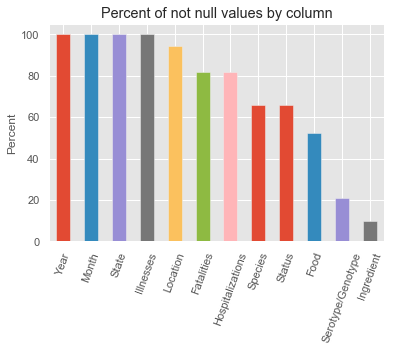

In [13]:
# Plot of null values by column
percent_not_null_values.plot(kind="bar",rot=70)
plt.title("Percent of not null values by column")
plt.ylabel("Percent")
#plt.xlabel("Column")
plt.show()

Removing columns with many null values($\approx 50 \%$ or more )

In [14]:
# Removing columns: Food, Serotype/Genotype and Ingredient
outbreaks= outbreaks[['Year', 'Month', 'State', 'Species',"Status",
       'Location', "Food",'Illnesses', 'Hospitalizations', 'Fatalities']]

In [15]:
raw_outbreaks = outbreaks # backup
raw_outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 10 columns):
Year                19986 non-null int64
Month               19986 non-null object
State               19986 non-null object
Species             13196 non-null object
Status              13196 non-null object
Location            18833 non-null object
Food                10500 non-null object
Illnesses           19986 non-null float64
Hospitalizations    16340 non-null float64
Fatalities          16374 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.5+ MB


Logaritm of the number of illnesses 

/Users/haruto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


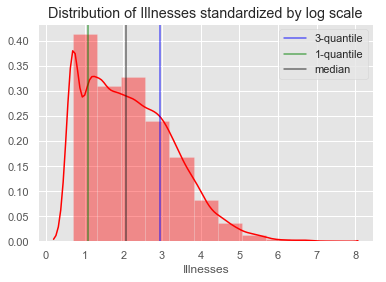

In [16]:

outbreaks["log_stand_Illnesses"]=np.log(outbreaks.Illnesses)
mean = outbreaks["log_stand_Illnesses"].mean()
std = outbreaks["log_stand_Illnesses"].std()
median = outbreaks["log_stand_Illnesses"].median()
quant_3 = np.percentile(outbreaks["log_stand_Illnesses"],75)
quant_1 = np.percentile(outbreaks["log_stand_Illnesses"],25)
plt.cla()
sns.distplot(np.log(outbreaks.Illnesses), bins=11, color='red',fit=None)
plt.title('Distribution of Illnesses standardized by log scale')
plt.axvline(x=quant_3,label = "3-quantile",c="blue",alpha = 0.6)
plt.axvline(x=quant_1, label = "1-quantile",c="green",alpha = 0.6)
plt.axvline(x=median, label = "median",c="k",alpha = 0.6)
plt.legend()
display()

In [17]:
def middle(column):
    return outbreaks[column].median()

median = middle("log_stand_Illnesses")
outbreaks["A_lot_of_Ill"]=outbreaks.log_stand_Illnesses >= median
outbreaks["A_lot_of_Ill"]= outbreaks.A_lot_of_Ill.astype("float")
outbreaks.head()

,Year,Month,State,Species,Status,Location,Food,Illnesses,Hospitalizations,Fatalities,log_stand_Illnesses,A_lot_of_Ill
0,2009,January,MN,Norovirus,Suspected,Restaurant - Sit-down dining,NaN,2.0,0.0,0.0,0.693147,0.0
1,2009,January,MN,Norovirus,Confirmed,NaN,NaN,16.0,0.0,0.0,2.772589,1.0
2,2009,January,MN,Norovirus,Suspected,Restaurant - Sit-down dining,NaN,5.0,0.0,0.0,1.609438,0.0
3,2009,January,MN,Norovirus,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",NaN,3.0,0.0,0.0,1.098612,0.0
4,2009,January,MN,Norovirus,Confirmed,Restaurant - other or unknown type,cookies,21.0,0.0,0.0,3.044522,1.0


To treat the null values we work with each feature separately. To each null entry we  assign a random value from the set of possible values of the column.

In [18]:
def clean_column(column):
    np.random.seed(123)
    not_null_values= column[~column.isnull()].values
    column=column.fillna('null',inplace= False)
    nan_to_something= lambda x: np.random.choice(not_null_values,1,replace= True)[0] if x=="null" else x
    return column.apply(nan_to_something)

In [19]:
for column in outbreaks.columns:
    if outbreaks[column].isnull().sum() > 0.0:
        not_null_column = clean_column(outbreaks[column])
        del outbreaks[column]
        outbreaks[column] = not_null_column
        not_null_column = None


In [20]:
import re
def leading_spaces(column):
    begin_spaces=lambda str: True  if re.search(r'^\s', str) else False
    return (outbreaks[column].apply(begin_spaces)).sum()

str_columns = ['Species', 'Location', 'Food']
for column in str_columns:
    #Trailing
    print("Number of observations with Leading spaces in column {}: {}".format(column,leading_spaces(column)) )

print("") 
    
def trailing_spaces(column):
    trailing_spaces=lambda str: True  if re.search(r'\s$', str) else False
    return (outbreaks[column].apply(trailing_spaces)).sum()


for column in str_columns:
    #Trailing
    print("Number of observations with trailing spaces in column {}: {}".format(column,trailing_spaces(column)) )

Number of observations with Leading spaces in column Species: 0
Number of observations with Leading spaces in column Location: 0
Number of observations with Leading spaces in column Food: 0

Number of observations with trailing spaces in column Species: 0
Number of observations with trailing spaces in column Location: 0
Number of observations with trailing spaces in column Food: 2


In [21]:
remove_trailing = lambda word: word.strip()
outbreaks["Food"] = outbreaks["Food"].apply(remove_trailing)
print("Number of observations with trailing spaces in Food: {}"\
      .format(trailing_spaces("Food") )) 

Number of observations with trailing spaces in Food: 0


In [22]:
# Any space before of after the ;
for column in str_columns:
    print("For {}, do all semicolons contain an space after? {}".format(column,(outbreaks[column].str.contains(";")).sum() \
    ==(outbreaks[column].str.contains("; ")).sum()))
print("")
for column in str_columns:
    print("For {}, number of observations that  contain an space before ; {}"\
          .format(column,(outbreaks[column].str.contains(" ;")).sum()))

For Species, do all semicolons contain an space after? True
For Location, do all semicolons contain an space after? True
For Food, do all semicolons contain an space after? True

For Species, number of observations that  contain an space before ; 0
For Location, number of observations that  contain an space before ; 0
For Food, number of observations that  contain an space before ; 0


In [23]:
def from_str_to_list(column):
    # Transforming the entries to list 
    if_multi_erase_space = lambda entry: entry.replace("; ",";") if ";" in entry else entry
    #erase_space  = lambda x: x.replace("; ",";")
    str_to_list  = lambda x: x.split(";")
    loc_list = column.apply(if_multi_erase_space).apply(str_to_list)
    # Sorting the entries
    sorted_entry = lambda x: sorted(x)
    return loc_list.apply(sorted_entry)# list

def length(column):# Return the number of instances for each observation
    length = lambda x: len(x)
    return column.apply(length)

def list_to_string(column): # Transform from list to string
    ls_to_str = lambda x: "; ".join(x)
    return  column.apply(ls_to_str)

In [24]:
outbreaks["Location"]= list_to_string(from_str_to_list(outbreaks.Location))
outbreaks["Species"]= list_to_string(from_str_to_list(outbreaks.Species))
outbreaks["Food"]= list_to_string(from_str_to_list(outbreaks.Food))

In [25]:
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19986 entries, 0 to 19985
Data columns (total 12 columns):
Year                   19986 non-null int64
Month                  19986 non-null object
State                  19986 non-null object
Illnesses              19986 non-null float64
log_stand_Illnesses    19986 non-null float64
A_lot_of_Ill           19986 non-null float64
Species                19986 non-null object
Status                 19986 non-null object
Location               19986 non-null object
Food                   19986 non-null object
Hospitalizations       19986 non-null float64
Fatalities             19986 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


median for hospitalizations 0.00


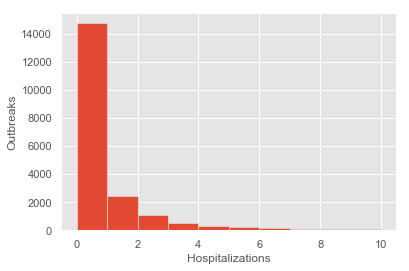

In [26]:
print("median for hospitalizations {:.2f}".format(np.percentile(outbreaks.Hospitalizations,50)))

plt.hist(outbreaks.Hospitalizations,bins = 10,range= [0.0,10] )
plt.xlabel("Hospitalizations")
plt.ylabel("Outbreaks")
plt.show()

In [27]:
print("Percent of outbreaks that not produce hospitalizations {:.1f} %".format(100.0*(outbreaks.Hospitalizations == 0.0).sum()/outbreaks.Hospitalizations.shape[0]))
print("Percent of outbreaks that produce hospitalizations {:.1f} %".format(100.0*(outbreaks.Hospitalizations > 0.0).sum()/outbreaks.Hospitalizations.shape[0]))

Percent of outbreaks that not produce hospitalizations 73.8 %
Percent of outbreaks that produce hospitalizations 26.2 %


Here we have a lot of cases with zero hospitalizations not many outbreaks with one or more hospitalizations(in fact they are at the rate of $75/25$)  that mimics a Pareto distribution. As most outbreaks do not generate hospitalizations, let us  divide the dataset in two categories: outbreaks with hospitalizations and outbreaks without them.

median for fatalities 0.00


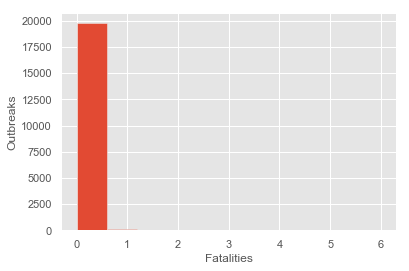

In [28]:
print("median for fatalities {:.2f}".format(np.percentile(outbreaks.Fatalities,50)))

plt.hist(outbreaks.Fatalities,bins = 10,range= [0.0,6] )
plt.xlabel("Fatalities")
plt.ylabel("Outbreaks")
plt.show()

In [29]:
print("Percent of outbreaks that not produce deaths {:.1f} %".format(100.0*(outbreaks.Fatalities == 0.0).sum()/outbreaks.Fatalities.shape[0]))
print("Percent of outbreaks that produce deaths {:.1f} %".format(100.0*(outbreaks.Fatalities > 0.0).sum()/outbreaks.Fatalities.shape[0]))

Percent of outbreaks that not produce deaths 98.9 %
Percent of outbreaks that produce deaths 1.1 %


Here we can see that the outbreaks with fatalities are very rare. The rate of deaths vs  not deaths is  $99/1$. So, essentially we have two classes: outbreaks with deaths and outbreaks without them.

In [30]:
outbreaks["Are_there_Hospitalizations"] = outbreaks.Hospitalizations > 0.0
outbreaks["Are_there_Hospitalizations"]=outbreaks["Are_there_Hospitalizations"].astype("float")
outbreaks["Are_there_Fatalities"] = outbreaks.Fatalities > 0.0
outbreaks["Are_there_Fatalities"]=outbreaks["Are_there_Fatalities"].astype("float")
outbreaks_backup = outbreaks
outbreaks.head()


,Year,Month,State,Illnesses,log_stand_Illnesses,A_lot_of_Ill,Species,Status,Location,Food,Hospitalizations,Fatalities,Are_there_Hospitalizations,Are_there_Fatalities
0,2009,January,MN,2.0,0.693147,0.0,Norovirus,Suspected,Restaurant - Sit-down dining,seafood-based salad unspecified,0.0,0.0,0.0,0.0
1,2009,January,MN,16.0,2.772589,1.0,Norovirus,Confirmed,Caterer (food prepared off-site from where ser...,"pork, carnitas; salsa, tomatillo",0.0,0.0,0.0,0.0
2,2009,January,MN,5.0,1.609438,0.0,Norovirus,Suspected,Restaurant - Sit-down dining,"cookies, unspecified; pasta salad",0.0,0.0,0.0,0.0
3,2009,January,MN,3.0,1.098612,0.0,Norovirus,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...","fish, grouper",0.0,0.0,0.0,0.0
4,2009,January,MN,21.0,3.044522,1.0,Norovirus,Confirmed,Restaurant - other or unknown type,cookies,0.0,0.0,0.0,0.0


In [142]:
outbreaks_years = outbreaks[["Year","Illnesses"]]
# Pandas serie with number of outbreaks by year(serie index)
byyear= outbreaks_years.groupby("Year").Illnesses.count()
byyear_percent = round(100.0*byyear/byyear.sum(),2);
print(byyear_percent)


Year
1998    6.58
1999    6.69
2000    7.02
2001    6.24
2002    6.60
2003    5.44
2004    6.65
2005    4.82
2006    6.26
2007    5.50
2008    5.14
2009    3.35
2010    4.27
2011    3.99
2012    4.17
2013    4.13
2014    4.37
2015    4.61
2016    4.16
Name: Illnesses, dtype: float64


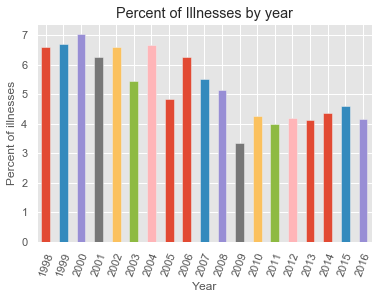

In [143]:
#Graph of number of Illnesses by year
byyear_percent.plot(kind ="bar",rot = 70,grid = True)
plt.title('Percent of Illnesses by year')
plt.ylabel('Percent of illnesses')
plt.show()

It seems that the number of outbreaks decreases with the passing of years.

In [33]:

def normed_by_year(column):
    outbreaks_years = outbreaks[["Year",column]]
    # Pandas serie with number of outbreaks by year(serie index)
    byyear= outbreaks_years.groupby("Year")[column].sum()
    year_to_total = dict(byyear)
    total= lambda outbreak: year_to_total[outbreak] 
    return (outbreaks[column] + 1)/(outbreaks.Year.apply(total)+1)
    

In [51]:
# we are not going to use the column Status
del outbreaks['Status']

In [52]:
def not_null_column(dataframe,column):
    return  dataframe[(~dataframe[column].isnull())]

def sort_by_frecuency(dataframe,column):
    outbreaks_column = pd.pivot_table(dataframe, index=column, values='Illnesses', aggfunc='count')
    # Sorted number of outbreaks by state
    sorted_by_column= outbreaks_column.sort_values(by="Illnesses",axis=0, ascending=False)
    percent_outbreaks_by_column= 100.0*sorted_by_column/dataframe.shape[0]
    percent_outbreaks_by_column.columns = ["%_of_outbreaks"]
    return percent_outbreaks_by_column

    
def most_common(dataframe,column,n_classes=10):
    n_null_df=not_null_column(dataframe,column)
    top_classes=sort_by_frecuency(n_null_df,column).head(n_classes).index
    def common_classes(element):
        # This fuction return the  n_classes classes that produced most of the outbreaks
        if element in top_classes:
            return element 
        else:
            return "Bulk"
    n_null_df["Most_common_" + column]=n_null_df[column].apply(common_classes)
    return n_null_df

def two_classes(dataframe,column,thr=0.0):
    not_null= dataframe[~dataframe[column].isnull()]
    not_null_column= not_null[column]
    not_null["Are_there_" + column]= not_null_column > thr
    not_null["Are_there_" + column]=not_null["Are_there_" + column].astype("float")
    return not_null

def classes_percent(dataframe,column,target, month=False):
    outbreaks_our_columns = dataframe[[column,target,'Illnesses']]
    outbreaks_each_class= pd.DataFrame(outbreaks_our_columns.
                                       groupby([column,target]).Illnesses.count())
    outbreaks_each_class.columns = ["Count"]
    if month:
        # Sort the results according to calendar 
        outbreaks_each_class_sorted=outbreaks_each_class.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December'],level=0)
    else:
        outbreaks_each_class_sorted =outbreaks_each_class 
    outbreaks_each_class_sorted["Percent"] = 0.0
    for indx,lev in enumerate(outbreaks_each_class_sorted.index.levels[0]):
        outbreaks_each_class_sorted.loc[lev,:]['Percent'] \
        = round(100.0*outbreaks_each_class_sorted.loc[lev,:].Count
                                                /outbreaks_each_class_sorted.sum(level = outbreaks_each_class_sorted.index.names[0]).Count[indx],2)
    return outbreaks_each_class_sorted

Correlation between Location and Hospitalizations

In [53]:
def dataframe_classes(dataframe,column,target,thr,n_classes,month=False):
    df0=most_common(dataframe,column,n_classes)
    df= two_classes(df0,target,thr)
    # Probability of getting one or more hospitalization if we chose a entry randdomly
    pure_random=100.0*(df["Are_there_"+ target]>thr)\
    .sum()/df["Are_there_"+ target].count()
    df1=classes_percent(df,"Most_common_" + column,"Are_there_"+ target,month)
    return pure_random,df,df1
    

In [54]:
Location_classes=dataframe_classes(outbreaks,\
"Location","Hospitalizations",0.0,10,False);
print("Percent of outbreaks that cause hospitalizations: {} %".format(round(Location_classes[0],0)))

/Users/haruto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Percent of outbreaks that cause hospitalizations: 26.0 %


In other words, If we randomly select an entry in our dataset, the probability that this observation causes hospitalizations is $26$%. This value is going to define our base model. If we know the location or the species would it  change this probability?

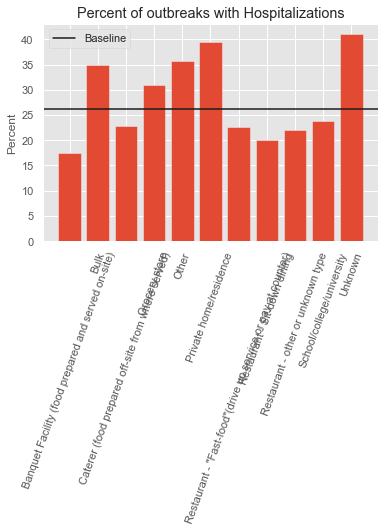

In [55]:
sorted_loc=Location_classes[2].unstack().Percent
sorted_loc.columns.name= "Hosp_percent"
sorted_loc.columns =["Zero","More_than_zero"]
sorted_loc.sort_values(by="More_than_zero", ascending=0,inplace=True)

plt.axhline(y=Location_classes[0], color = 'k',label ="Baseline")

plt.bar(sorted_loc.index,sorted_loc["More_than_zero"].values)
plt.ylabel("Percent")
plt.title("Percent of outbreaks with Hospitalizations")
plt.legend()
plt.xticks(rotation=70)
plt.show()

In [56]:
print("Locations that produce more Hospitalizations")

sorted_loc.head(3)

Locations that produce more Hospitalizations


,Zero,More_than_zero
Most_common_Location,,
Unknown,58.96,41.04
Private home/residence,60.52,39.48
Other,64.38,35.62


In [57]:
print("Locations that produce less Hospitalizations")

sorted_loc.tail(3)

Locations that produce less Hospitalizations


,Zero,More_than_zero
Most_common_Location,,
Restaurant - other or unknown type,77.98,22.02
Restaurant - Sit-down dining,79.95,20.05
Banquet Facility (food prepared and served on-site),82.51,17.49


As we can see, in general,  the feature  Location is not too bad indicator that if the outbreaks is going to have Hospitalizations or not.

In [58]:
Species_classes=dataframe_classes(outbreaks,\
"Species","Hospitalizations",0.0,10,False);
print("Percent of outbreaks that cause hospitalizations: {} %".format(round(Species_classes[0],0)))

/Users/haruto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Percent of outbreaks that cause hospitalizations: 26.0 %


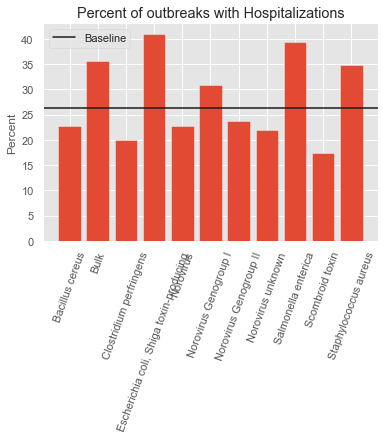

In [59]:
sorted_spec=Species_classes[2].unstack().Percent
sorted_spec.columns.name= "Spec_percent"
sorted_spec.columns =["Zero","More_than_zero"]
sorted_spec.sort_values(by="More_than_zero", ascending=0,inplace=True)

plt.axhline(y=Species_classes[0], color = 'k',label ="Baseline")

plt.bar(sorted_spec.index,sorted_loc["More_than_zero"].values)
plt.ylabel("Percent")
plt.title("Percent of outbreaks with Hospitalizations")
plt.legend()
plt.xticks(rotation=70)
plt.show()

In [60]:
print("Locations that produce more Hospitalizations")

sorted_spec.head(3)

Locations that produce more Hospitalizations


,Zero,More_than_zero
Most_common_Species,,
"Escherichia coli, Shiga toxin-producing",45.72,54.28
Salmonella enterica,50.81,49.19
Bulk,71.45,28.55


In [61]:
print("Locations that produce less Hospitalizations")

sorted_spec.tail(3)

Locations that produce less Hospitalizations


,Zero,More_than_zero
Most_common_Species,,
Norovirus unknown,86.13,13.87
Clostridium perfringens,87.26,12.74
Scombroid toxin,87.28,12.72


/Users/haruto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
No handles with labels found to put in legend.


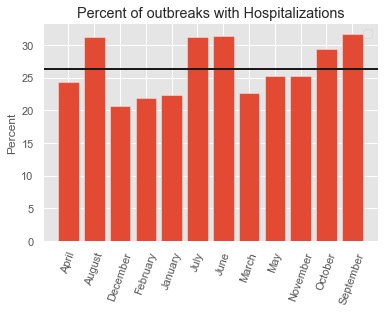

In [62]:
Month_classes=dataframe_classes(outbreaks,\
"Month","Hospitalizations",0.0,12,True);

plt.axhline(y=Month_classes[0], linewidth=2, color = 'k')

plt.bar(Month_classes[2].unstack().index,Month_classes[2].unstack().Percent.values[:,1])
plt.xticks(rotation=70)
plt.ylabel("Percent")
plt.title("Percent of outbreaks with Hospitalizations")
plt.legend()

plt.show()

In [63]:
sorted_month=Month_classes[2].unstack().Percent
sorted_month.columns.name= "Spec_percent"
sorted_month.columns =["Zero","More_than_zero"]
sorted_month.sort_values(by="More_than_zero", ascending=0,inplace=True)

print("Locations that produce more Hospitalizations")

sorted_month.head(3)

Locations that produce more Hospitalizations


,Zero,More_than_zero
Most_common_Month,,
September,68.31,31.69
June,68.63,31.37
July,68.81,31.19


In [64]:
print("Locations that produce less Hospitalizations")

sorted_month.tail(3)

Locations that produce less Hospitalizations


,Zero,More_than_zero
Most_common_Month,,
January,77.71,22.29
February,78.12,21.88
December,79.41,20.59


It seems that knowing only the month in which the outbreak occurred is not useful in predicting whether there were hospitalizations(at less compared with other features). 

In [65]:
# Remove Republic of Palau 
outbreaks= outbreaks[outbreaks.State!="PW"]
#outbreaks= outbreaks[outbreaks.State !="Multistate"]
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19985
Data columns (total 13 columns):
Year                          19984 non-null int64
Month                         19984 non-null object
State                         19984 non-null object
Illnesses                     19984 non-null float64
log_stand_Illnesses           19984 non-null float64
A_lot_of_Ill                  19984 non-null float64
Species                       19984 non-null object
Location                      19984 non-null object
Food                          19984 non-null object
Hospitalizations              19984 non-null float64
Fatalities                    19984 non-null float64
Are_there_Hospitalizations    19984 non-null float64
Are_there_Fatalities          19984 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 2.1+ MB


/Users/haruto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
No handles with labels found to put in legend.


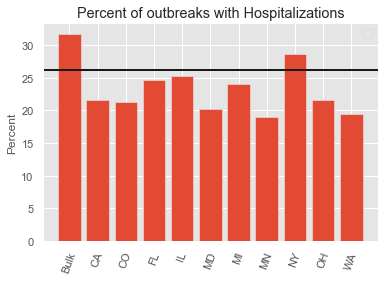

In [66]:
State_classes=dataframe_classes(outbreaks,\
"State","Hospitalizations",0.0,10,False);

plt.axhline(y=State_classes[0], linewidth=2, color = 'k')

plt.bar(State_classes[2].unstack().index,State_classes[2].unstack().Percent.values[:,1])
plt.xticks(rotation=70)
plt.ylabel("Percent")
plt.title("Percent of outbreaks with Hospitalizations")
plt.legend()
plt.show()

In [67]:
sorted_State=State_classes[2].unstack().Percent
sorted_State.columns.name= "Spec_percent"
sorted_State.columns =["Zero","More_than_zero"]
sorted_State.sort_values(by="More_than_zero", ascending=0,inplace=True)

print("Locations that produce more Hospitalizations")

sorted_State.head(4)

Locations that produce more Hospitalizations


,Zero,More_than_zero
Most_common_State,,
Bulk,68.20,31.80
NY,71.35,28.65
IL,74.68,25.32
FL,75.35,24.65


In [68]:
print("Locations that produce less Hospitalizations")

sorted_State.tail(4)

Locations that produce less Hospitalizations


,Zero,More_than_zero
Most_common_State,,
CO,78.66,21.34
MD,79.79,20.21
WA,80.53,19.47
MN,81.07,18.93


/Users/haruto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
No handles with labels found to put in legend.


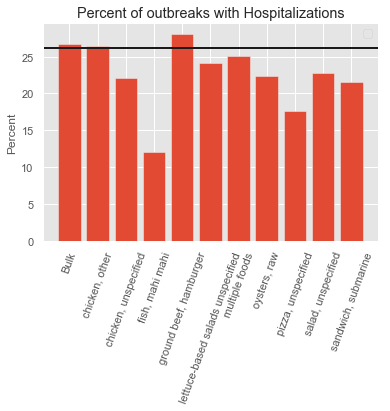

In [69]:
Food_classes=dataframe_classes(outbreaks,\
"Food","Hospitalizations",0.0,10,False);

plt.axhline(y=Food_classes[0], linewidth=2, color = 'k')

plt.bar(Food_classes[2].unstack().index,Food_classes[2].unstack().Percent.values[:,1])
plt.xticks(rotation=70)
plt.ylabel("Percent")
plt.title("Percent of outbreaks with Hospitalizations")
plt.legend()
plt.show()

In [70]:
sorted_Food=Food_classes[2].unstack().Percent
sorted_Food.columns.name= "Spec_percent"
sorted_Food.columns =["Zero","More_than_zero"]
sorted_Food.sort_values(by="More_than_zero", ascending=0,inplace=True)
print("Food that produce more Hospitalizations")
sorted_Food.head(4)

Food that produce more Hospitalizations


,Zero,More_than_zero
Most_common_Food,,
"ground beef, hamburger",71.88,28.12
Bulk,73.35,26.65
"chicken, other",73.51,26.49
multiple foods,74.94,25.06


In [71]:
print("Food that produce less Hospitalizations")
sorted_Food.tail(4)

Food that produce less Hospitalizations


,Zero,More_than_zero
Most_common_Food,,
"chicken, unspecified",77.88,22.12
"sandwich, submarine",78.48,21.52
"pizza, unspecified",82.39,17.61
"fish, mahi mahi",87.90,12.10


median for hospitalizations 13.00


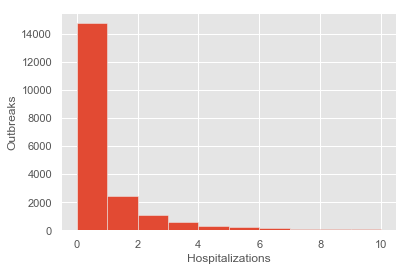

In [72]:
print("median for hospitalizations {:.2f}".format(np.percentile(outbreaks.Hospitalizations,99)))

plt.hist(outbreaks.Hospitalizations,bins = 10,range= [0.0,10] )
plt.xlabel("Hospitalizations")
plt.ylabel("Outbreaks")
plt.show()

In [73]:
print(np.percentile(outbreaks.Hospitalizations,99.9))
outbreaks[outbreaks.Hospitalizations > \
          np.percentile(outbreaks.Hospitalizations,99.9)]

57.0


,Year,Month,State,Illnesses,log_stand_Illnesses,A_lot_of_Ill,Species,Location,Food,Hospitalizations,Fatalities,Are_there_Hospitalizations,Are_there_Fatalities
2526,2011,July,MUL_STATE,147.0,4.990433,1.0,Listeria monocytogenes,Private home/residence,cantaloupe,143.0,33.0,1.0,1.0
3142,2012,July,MUL_STATE,261.0,5.564520,1.0,Salmonella enterica; Salmonella enterica,Private home/residence,cantaloupe,94.0,3.0,1.0,1.0
3782,2013,March,MUL_STATE,157.0,5.056246,1.0,Hepatitis A,Private home/residence,pomegranate seeds,70.0,0.0,1.0,0.0
3908,2013,March,MUL_STATE,634.0,6.452049,1.0,Salmonella enterica,Restaurant - other or unknown type,chicken,200.0,0.0,1.0,0.0
4799,2004,July,MUL_STATE,429.0,6.061457,1.0,Salmonella enterica; Salmonella enterica; Salm...,Restaurant - other or unknown type,roma tomato,129.0,0.0,1.0,0.0
4918,1999,May,WA,2.0,0.693147,0.0,Listeria monocytogenes,Restaurant - other or unknown type,"chicken, unspecified; noodles, unspecified; po...",129.0,0.0,1.0,0.0
5422,1998,October,MUL_STATE,101.0,4.615121,1.0,Listeria monocytogenes,Other,"hot dog, unspecified",101.0,21.0,1.0,1.0
7150,2000,August,MD,3.0,1.098612,0.0,Norovirus Genogroup I,Restaurant - other or unknown type,"fish sandwich, unspecified; shrimp, unspecified",101.0,0.0,1.0,0.0
8715,1998,March,TX,125.0,4.828314,1.0,Norovirus Genogroup II,School/college/university,"sandwich, unspecified",60.0,0.0,1.0,0.0
10904,2001,September,OH,112.0,4.718499,1.0,Staphylococcus aureus,"Fair, festival, other temp or mobile services;...","ham, unspecified; pork, roasted",58.0,0.0,1.0,0.0


In [74]:
import seaborn as sns
def outliers_by_month(column):
    sns.catplot(x="Month", y=column,jitter=0.2,height=5.0, aspect=7/5.0,data=outbreaks);
    plt.xticks(rotation=70);
    plt.xlabel("Months");
    plt.ylabel(column);
    plt.axhline(y=np.percentile(outbreaks[column],99.9), linewidth=0.8, color = 'red',label = "99.9 percentile");
    plt.legend();
    


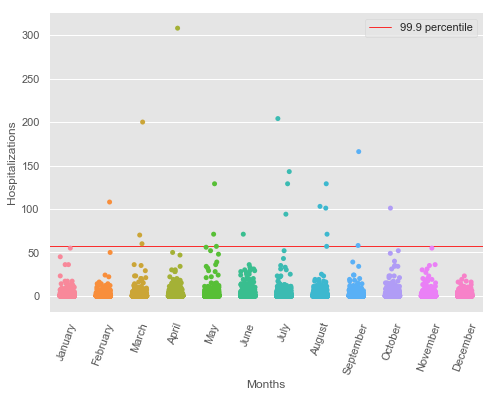

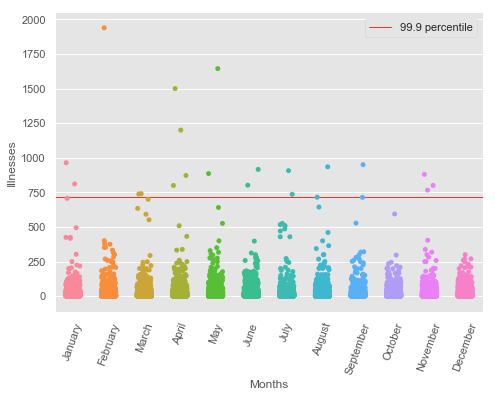

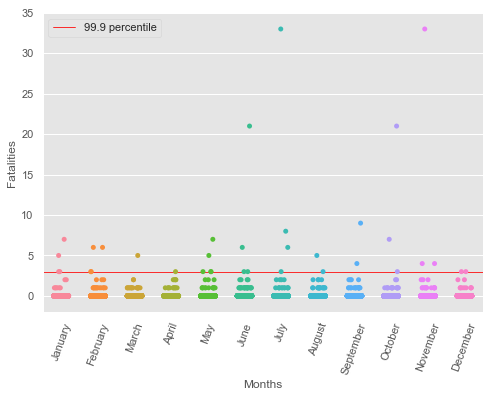

In [75]:
str_columns= ['Hospitalizations',"Illnesses","Fatalities"]
for column in str_columns:
    outliers_by_month(column)

Since our data is like-Pareto distributed the threshold that we would chose can not be too restrictive. Otherwise, we will lose valuable information in the class that describes the outbreaks that generate hospitalizations. Here we will consider a threshold of 99.9 % for 'Hospitalizations' and "Illnesses" and  about 99.95 % for "Fatalities".

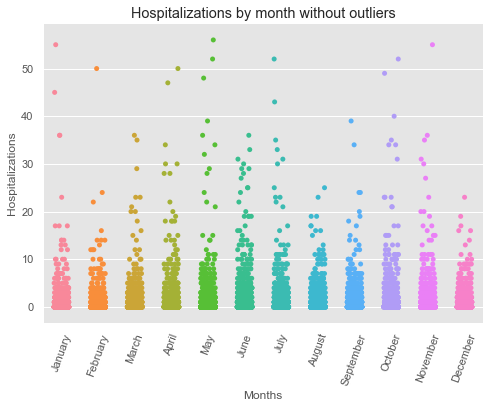

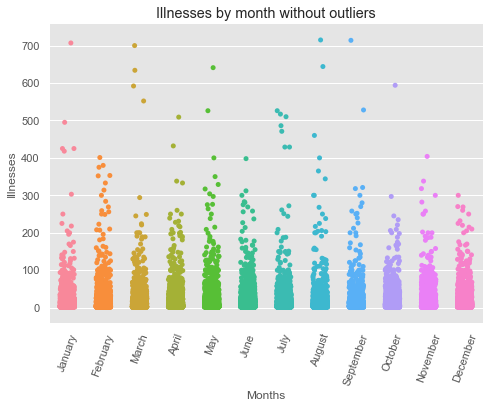

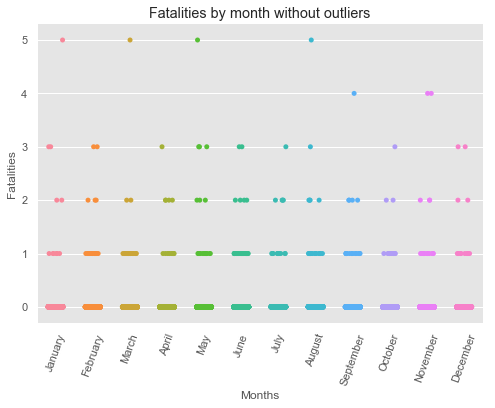

In [76]:

def without_outliers(column,threshold=99.9, fata_threshold=99.9):
    if column == "Fatalities":
        threshold = fata_threshold
        
    no_outliers=outbreaks[outbreaks[column] <np.percentile(outbreaks[column],threshold)]
    sns.catplot(x="Month", y=column,jitter=0.2,height=5.0, aspect=7/5.0,data=no_outliers);
    plt.xticks(rotation=70);
    plt.xlabel("Months");
    plt.ylabel(column);
    plt.title(column + " by month without outliers")
# Let us treat 'Hospitalizations' and "Illnesses" together
for column in str_columns[:2]:
    without_outliers(column,threshold=99.9)
# The threshold for  "Fatalities" is 99.5%
without_outliers("Fatalities",fata_threshold=99.95)

In [77]:
hosp_not_outliers= (outbreaks['Hospitalizations'] < np.percentile(outbreaks['Hospitalizations'],99.9))
ill_not_outliers= (outbreaks['Illnesses'] < np.percentile(outbreaks['Illnesses'],99.9))
fat_not_outliers= (outbreaks["Fatalities"] < np.percentile(outbreaks['Fatalities'],99.95))
# Dataset without outliers
outbreaks=outbreaks[hosp_not_outliers & ill_not_outliers & fat_not_outliers ]

In [78]:
def common_classes(element):
    global top_classes
    # This fuction return the  n_classes classes that produced most of the outbreaks
    if element in top_classes:
        return element 
    else:
        return "Bulk"

In [79]:
n_classes = 10
columns = ['Species', 'Location', 'Food']
for column in columns:
    top_classes= sort_by_frecuency(outbreaks,column).head(n_classes).index
    outbreaks["Most_common_" + column]= outbreaks[column].apply(common_classes)

outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19936 entries, 0 to 19985
Data columns (total 16 columns):
Year                          19936 non-null int64
Month                         19936 non-null object
State                         19936 non-null object
Illnesses                     19936 non-null float64
log_stand_Illnesses           19936 non-null float64
A_lot_of_Ill                  19936 non-null float64
Species                       19936 non-null object
Location                      19936 non-null object
Food                          19936 non-null object
Hospitalizations              19936 non-null float64
Fatalities                    19936 non-null float64
Are_there_Hospitalizations    19936 non-null float64
Are_there_Fatalities          19936 non-null float64
Most_common_Species           19936 non-null object
Most_common_Location          19936 non-null object
Most_common_Food              19936 non-null object
dtypes: float64(7), int64(1), object(8)
memory usage:

In [80]:
"""#Percent of outbreaks for each class  in a given column
def percent_outbreaks(column):
    # Group by classes
    groupby= outbreaks.groupby(column)[column].agg("count")
    # Dataframe where the indexes are species and number of outbreaks are the column.
    groupby= pd.DataFrame(groupby)
    groupby.columns = ["outbreaks"]
    # Sorted dataframe
    groupby = groupby.sort_values("outbreaks",ascending=False)
    # Percent of outbreaks by class
    percent = lambda x: 100.0*x/outbreaks.shape[0]
    groupby["Percent"]=groupby.outbreaks.apply(percent)
    return groupby[["Percent"]]

def fig_percent(column):
    percent_outbreaks(column)[:15].Percent.plot(kind = "bar",rot = 80,log= False)
    plt.ylabel("Percent")
    #plt.legend("%")
    plt.show()"""

'#Percent of outbreaks for each class  in a given column\ndef percent_outbreaks(column):\n    # Group by classes\n    groupby= outbreaks.groupby(column)[column].agg("count")\n    # Dataframe where the indexes are species and number of outbreaks are the column.\n    groupby= pd.DataFrame(groupby)\n    groupby.columns = ["outbreaks"]\n    # Sorted dataframe\n    groupby = groupby.sort_values("outbreaks",ascending=False)\n    # Percent of outbreaks by class\n    percent = lambda x: 100.0*x/outbreaks.shape[0]\n    groupby["Percent"]=groupby.outbreaks.apply(percent)\n    return groupby[["Percent"]]\n\ndef fig_percent(column):\n    percent_outbreaks(column)[:15].Percent.plot(kind = "bar",rot = 80,log= False)\n    plt.ylabel("Percent")\n    #plt.legend("%")\n    plt.show()'

In [144]:
xnew= outbreaks[(outbreaks.Year >=2010)]
outbreaks_clasif=xnew[['Year', "Month",'State', 'Most_common_Species',
       'Most_common_Location', 'A_lot_of_Ill','Are_there_Hospitalizations','Are_there_Fatalities']]
#outbreaks_clasif=outbreaks_reduced[["Species","severity_Illnesses"]]

In [145]:
outbreaks_dummies =pd.get_dummies(outbreaks_clasif,drop_first=True)

outbreaks_dummies.head()

,Year,A_lot_of_Ill,Are_there_Hospitalizations,Are_there_Fatalities,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,...,Most_common_Location_Bulk,Most_common_Location_Caterer (food prepared off-site from where served),Most_common_Location_Grocery store,Most_common_Location_Other,Most_common_Location_Private home/residence,"Most_common_Location_Restaurant - ""Fast-food""(drive up service or pay at counter)",Most_common_Location_Restaurant - Sit-down dining,Most_common_Location_Restaurant - other or unknown type,Most_common_Location_School/college/university,Most_common_Location_Unknown
471,2010,1.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
475,2010,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
484,2010,1.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
506,2010,1.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
508,2010,1.0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [153]:

#y = outbreaks_dummies['severity_Illnesses'].values.reshape(-1,1)
#X = outbreaks_dummies.drop('severity_Illnesses', axis=1).values
y = outbreaks_dummies['Are_there_Illnesses'].values.reshape(-1,1)
X = outbreaks_dummies.drop('Are_there_Illnesses', axis=1).values



KeyError: 'Are_there_Illnesses'

In [154]:
"""
from sklearn.svm import SVC


reg = SVC(kernel='linear', 
            #class_weight='balanced', # penalize
            probability=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv


# Fit to the training set
reg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = reg.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(reg.score(X_test, y_test)))
#print(classification_report(y_test, y_pred))
#print("Tuned Model Parameters: {}".format(s.best_params_))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
"""


'\nfrom sklearn.svm import SVC\n\n\nreg = SVC(kernel=\'linear\', \n            #class_weight=\'balanced\', # penalize\n            probability=True)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)\n\n# Instantiate the GridSearchCV object: cv\n\n\n# Fit to the training set\nreg.fit(X_train, y_train)\n\n# Predict the labels of the test set: y_pred\ny_pred = reg.predict(X_test)\n\n# Compute and print metrics\nprint("Accuracy: {}".format(reg.score(X_test, y_test)))\n#print(classification_report(y_test, y_pred))\n#print("Tuned Model Parameters: {}".format(s.best_params_))\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test, y_pred))\n'

In [179]:
# Import the necessary modules
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import (BernoulliNB,GaussianNB,MultinomialNB)
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(penalty= 'l2')
#logreg= BernoulliNB(alpha=1.0)
#logreg = RandomForestClassifier()
#logreg = XGBClassifier(max_depth=10, learning_rate=1.5)
#logreg = SVC()
#logreg = KNeighborsClassifier(n_neighbors=3)
    #objective='binary:logistic', max_depth=5, learning_rate=1.0,n_estimators=16, subsample=1, colsample_bytree=0.8,seed=123)
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

        0.0       0.81      0.93      0.87      1729
        1.0       0.69      0.42      0.52       641

avg / total       0.78      0.79      0.77      2370



/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


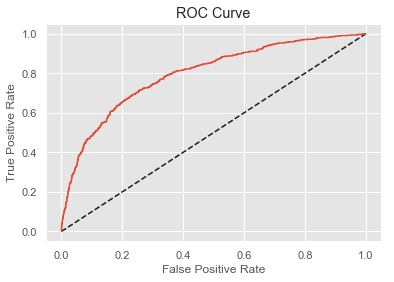

In [162]:
# Import necessary modules
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [163]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [164]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RepeatedEditedNearestNeighbours,TomekLinks,AllKNN,NeighbourhoodCleaningRule,OneSidedSelection
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
# Train and test sets
training_features_org, test_features_org,training_target_org, test_target_org, = train_test_split(X,y,test_size = .2,random_state=12)
# Splitin the previous training set into training a validation set

training_features, test_features,training_target, test_target, = train_test_split(training_features_org,training_target_org,test_size = .2,random_state=12)

sm = SMOTEENN(random_state=123, ratio = "auto")
#sm = SMOTETomek(random_state=12, ratio = "auto")
#sm = AllKNN(random_state=12, ratio = "auto")
#sm = OneSidedSelection(random_state=12, ratio = "auto")
#sm = NeighbourhoodCleaningRule(random_state=12, ratio = "auto")
x_train_res, y_train_res = sm.fit_sample(training_features, training_target)


/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
recall_score1 = make_scorer(recall_score, pos_label=1)


#clf = GridSearchCV(SVC(), tuned_parameters, cv=4, scoring=f2_score, n_jobs=-1)

In [197]:
from imblearn.over_sampling import SMOTE  # or: import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

# Generate some data with an 8-to-2 class imbalance.


X_train, X_test, y_train, y_test = train_test_split(training_features, training_target, test_size=0.33, random_state=444);

# This doesn't work with sklearn.pipeline.Pipeline because
# RandomOverSampler doesn't have a .tranform() method.
# (It has .fit_sample() or .sample().
pipe = imbPipeline([
    ('oversample', SMOTE(random_state=12, ratio = "auto")),\
    ('clf', LogisticRegression())]);

"""pipe = imbPipeline([
    ('oversample', SMOTE(random_state=444,ratio = 0.4)),
    ('clf', XGBClassifier(objective='binary:logistic',subsample=1,colsample_bytree=0.8,seed=123))
    ]) 
"""
max_depth=list(range(2,20,2))
learning_rate=[0.01,0.1,0.5,1.0,2.0,3.0,5.0,8.0,10.0]
n_estimators=list(range(2,20))
#colsample_bytree=[0.01,0.05,0.1,0.3,0.6,0.8,0.9]
cs= [0.01,0.05,0.1,0.5,1.0,5.0,10.0,20.0]
param_grid = {'clf__C': cs, 'clf__penalty': ['l1', 'l2']}
#param_grid = {'clf__alpha':[0.001,0.05,0.1,0.2,0.3,0.5,0.7,0.8,1.0] }
#param_grid = {'clf__max_depth' : max_depth,"clf__learning_rate":learning_rate,"clf__n_estimators": n_estimators}
skf = 5 #StratifiedKFold()
#param_grid = {'clf__max_depth': [25, 40],'clf__max_features': ['sqrt', 'log2']}

grid = GridSearchCV(pipe, param_grid, return_train_score=False,\
                    verbose=False, scoring="recall", cv=5);
grid.fit(X_train, y_train);
print(grid.score(X_test, y_test))
print(grid.best_params_)


/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

0.7329192546583851
{'clf__C': 0.1, 'clf__penalty': 'l2'}


/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [196]:
logreg = BernoulliNB(alpha=0.1)
logreg.fit(training_features_org, training_target_org)
y_pred = grid.predict(test_features_org)

# Compute and print the confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))
print(classification_report(test_target_org, y_pred))


             precision    recall  f1-score   support

        0.0       0.86      0.80      0.83       860
        1.0       0.55      0.66      0.60       325

avg / total       0.78      0.76      0.76      1185



/Users/haruto/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
"""# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RepeatedEditedNearestNeighbours,TomekLinks,AllKNN,NeighbourhoodCleaningRule,OneSidedSelection
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
train_res = []
n_splits = 0
training_features, test_features,training_target, test_target, = train_test_split(X,y,test_size = .3,random_state=12)
for i in range(n_splits +1):
    sm = SMOTEENN(random_state=12+i, ratio = "auto")
    #sm = SMOTETomek(random_state=12, ratio = "auto")
    #sm = AllKNN(random_state=12, ratio = "auto")
    #sm = OneSidedSelection(random_state=12, ratio = "auto")
    #sm = NeighbourhoodCleaningRule(random_state=12, ratio = "auto")
    (x_train_res, y_train_res) = sm.fit_sample(training_features, training_target)
    train_res.append((x_train_res, y_train_res))"""

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
def recall_score(method):
    method.fit(x_train_res, y_train_res)
    y_pred= method.predict(test_features)
    #Compute and print the confusion matrix and classification report
    #print('\nTest Results')
    #print(confusion_matrix(test_target, y_pred))
    result = classification_report(test_target, y_pred)
    #precision_recall_fscore_support(test_target, y_pred,average = None)
    #print(classification_report(test_target, y_pred))
    return  result


In [ ]:
print(recall_score(XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.4,n_estimators=15, subsample=1, colsample_bytree=0.8,seed=123)))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import (BernoulliNB,GaussianNB,MultinomialNB)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#svm= SVC(kernel='rbf',probability=True)
xgb_reg = XGBClassifier(objective='binary:logistic', max_depth=5, learning_rate=1.0,n_estimators=16, subsample=1, colsample_bytree=0.8,seed=123)
ada_reg= AdaBoostClassifier(n_estimators=100,learning_rate=1.0 ,random_state=0)
grad_reg = GradientBoostingClassifier(n_estimators=15,learning_rate=1.0 ,random_state=0)
rand_reg = RandomForestClassifier(n_estimators=16, random_state=12)

classifier= [xgb_reg,ada_reg,grad_reg,rand_reg,BernoulliNB(),GaussianNB(),MultinomialNB(),LogisticRegression()]
#print("f1-score: {:.2f}".format(f1_score(clf_rf)))
reg_scores ={}
for reg in classifier:
    reg_scores[str(reg)[:str(reg)[:].find("(")]] = f1_score(reg)
reg_scores